# Clustering - berilgan input qiymatlarni o`xhash turiga ko`ra guruhlash

# Clusteringda eng aktiv foydalaniladigan algaritm bu -K_Means Clustering 

# K_Means Clustering 
- assign cluster centroids
- move cluster centroid 
- k number of clusters 

# K means da asosiy vazifa : sentroidni aniqlash va uni kerakli joygacha surish

# Convergence - boshqa o`zgarmaydigan xolatga kelgan centoid ga aytiladi

# Clusterlarda K ning soni Elbow metod yordamida topiladi

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing  import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
features = ["age", "fare", "pclass", "sibsp", "parch"]

data = df[features].copy()
data = data.dropna()

data.head()

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

,age,fare,pclass,sibsp,parch
0,22.0,7.2500,3,1,0
1,38.0,71.2833,1,1,0
2,26.0,7.9250,3,0,0
3,35.0,53.1000,1,1,0
4,35.0,8.0500,3,0,0


In [3]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

# K ni topish uchun Elbow metodini qo`llash

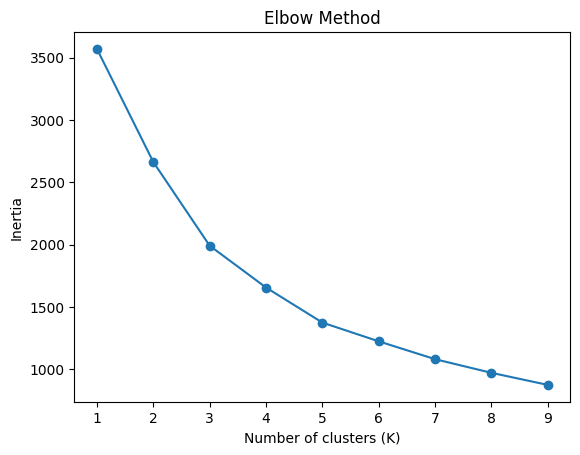

In [6]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(k_range, inertia, marker= "o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# K = 3 ni tanlaymiz 

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(x_scaled)
cluster = kmeans.labels_
data["Cluster"] = cluster

# Silhouette Score 

In [29]:
score = silhouette_score(x_scaled, cluster)
print("Silhoutee score : ", score)

Silhoutee score :  0.3810124520620728


# Silhoutee score 0.5 dan 0.7 gacha natija bersa bu yaxshi hisoblanadi

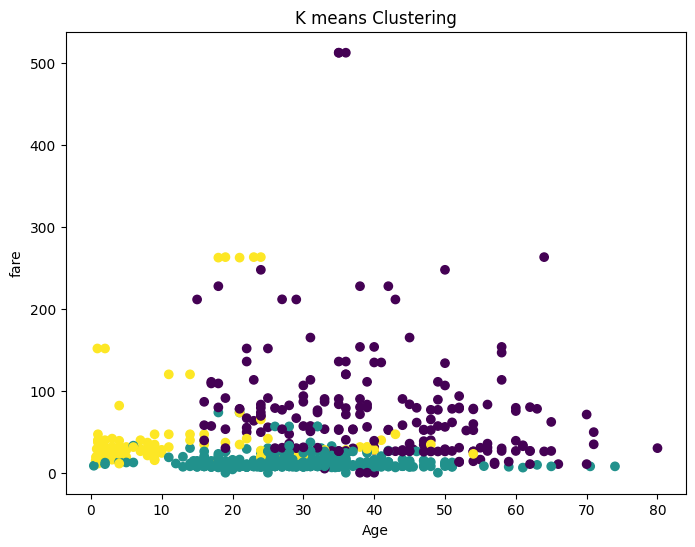

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(data["age"], data["fare"], c=data["Cluster"])
plt.xlabel("Age")
plt.ylabel("fare")
plt.title("K means Clustering")
plt.show()

In [31]:
cluster_summary = data.groupby("Cluster").mean()
cluster_summary

,age,fare,pclass,sibsp,parch
Cluster,,,,,
0,40.891414,75.853515,1.111111,0.398990,0.318182
1,28.196451,12.520862,2.707434,0.218225,0.136691
2,13.643939,45.774620,2.505051,1.979798,1.898990


# Cluster 0 bu - yuqori fare yani boy yo`lovchilar 
# Cluster 1 bu - past farte yani kam pulli yolvchilar 
# Cluster 2 bu -  orta fare yani ortacha daromadli yolovchilar 

In [32]:
import os 
save_path = r"C:\Users\Rasulbek907\Desktop\Project_One\Data\Clustering"
os.makedirs(save_path, exist_ok = True)

file_path = os.path.join(save_path, "titanic_cluster.csv")
data.to_csv(file_path, index=False)

print("Fayl Saqlandi", file_path)

Fayl Saqlandi C:\Users\Rasulbek907\Desktop\Project_One\Data\Clustering\titanic_cluster.csv


In [33]:
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_One\Data\Clustering\titanic_cluster.csv")
df.head()

,age,fare,pclass,sibsp,parch,Cluster
0,22.0,7.2500,3,1,0,1
1,38.0,71.2833,1,1,0,0
2,26.0,7.9250,3,0,0,1
3,35.0,53.1000,1,1,0,0
4,35.0,8.0500,3,0,0,1


#  Silhouette Score - bu clustering ni sifatini o`lchovchi metrik hisoblanadi 
- nuqta o`z clusteriga qanchalik yaqin 
- boshqa clusterdan qanchalik uzoq 

# Yani Cluster ichida zichlik -- clusterlar orasidagi ajralish

- "+"  1 ga yaqin natija = juda yaxshi ajratilgan 
- 0 atrofida bo`lsa = chegarada 
- "-"1 ga yaqin bo`lsa  = notogri clusterlash 